(540, 2500) (540,)


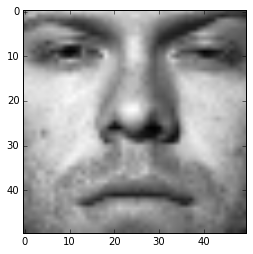

In [2]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print train_data.shape, train_labels.shape
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


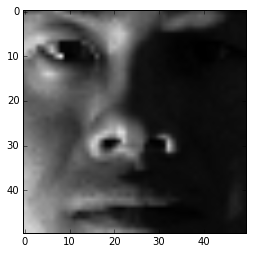

In [4]:
# 1.b: Load data from the test set
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print test_data.shape, test_labels.shape
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

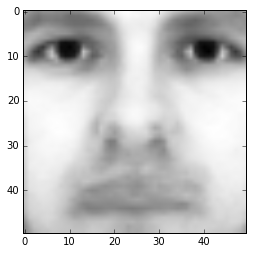

In [7]:
# 1.c: Compute the average face
average_face = np.mean(train_data, axis=0)
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

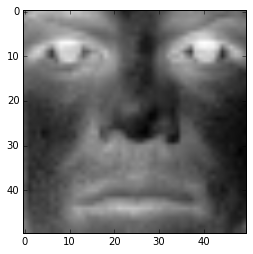

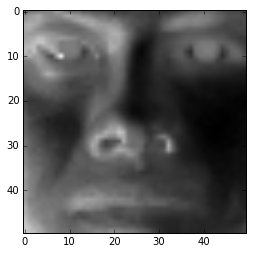

In [13]:
# 1.d: Subtract the average face from train_data, test_data
train_data = np.array([face-average_face for face in train_data])
test_data  = np.array([face-average_face for face in test_data])
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

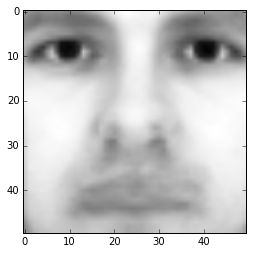

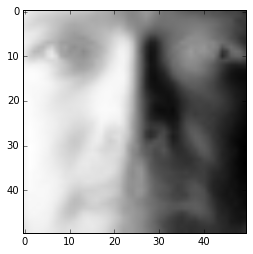

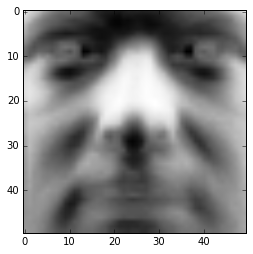

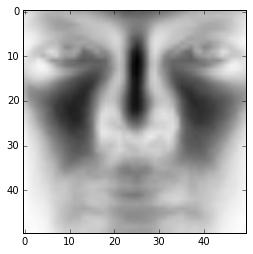

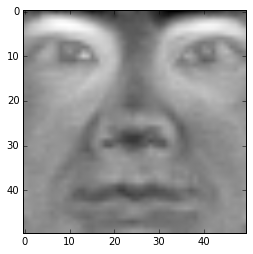

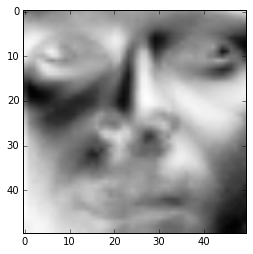

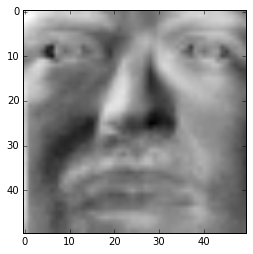

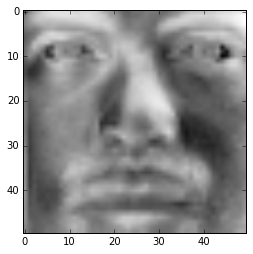

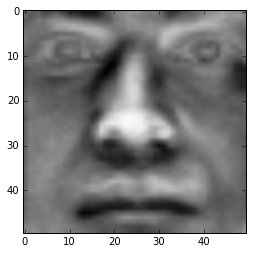

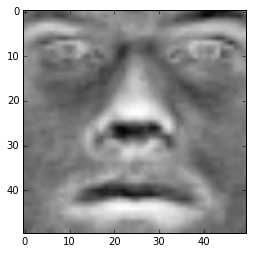

In [25]:
# 1.e: Compute eigenfaces
U, s, V = np.linalg.svd(train_data, full_matrices=False)
for i in range(10):
    plt.imshow(V[i, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

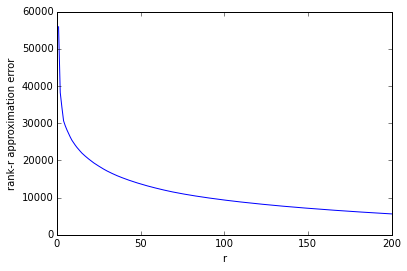

In [48]:
# 1.f: Plot rank-r approximation errors
r, error = range(1, 201), []
for i in r:
    train_data_approx = U[:,:i]*s[:i]
    train_data_approx = np.dot(train_data_approx, V[:i,:])
    error.append(np.linalg.norm(train_data-train_data_approx))
plt.plot(r, error)
plt.xlabel('r')
plt.ylabel('rank-r approximation error')
plt.show()

In [61]:
# 1.g: Generate r-dimensional feature matrices
def get_feature_matrices(r):
    return np.dot(train_data, V[:r,:].transpose()), np.dot(test_data, V[:r,:].transpose())

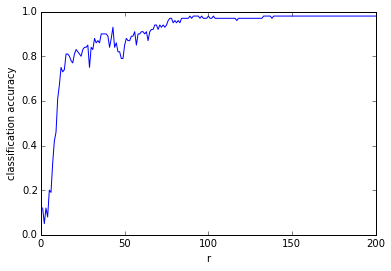

In [65]:
# 1.h: Logistic regression classifier for face recognition
from sklearn import linear_model
accuracy = []
for i in r:
    F, F_test = get_feature_matrices(i)
    accuracy.append(linear_model.LogisticRegression().fit(F, train_labels).score(F_test, test_labels))
    
plt.plot(r, accuracy)
plt.xlabel('r')
plt.ylabel('classification accuracy')
plt.show()